In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
randn = np.random
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def init_network():
    network = {}
    network['W1'] = np.array(randn.rand(2,3))
    network['b1'] = np.array(randn.rand(1,3))
    network['W2'] = np.array(randn.rand(3,2))
    network['b2'] = np.array(randn.rand(2,2))
    network['W3'] = np.array(randn.rand(2,2))
    network['b3'] = np.array(randn.rand(1,2))

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = sigmoid(a3)
    
    return y

In [6]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(network)
print(y)

{'W1': array([[ 0.77177485,  0.11047893,  0.30430206],
       [ 0.68559347,  0.14822332,  0.03569864]]), 'b1': array([[ 0.82813123,  0.96821793,  0.69294617]]), 'W2': array([[ 0.7850591 ,  0.87665641],
       [ 0.56865436,  0.25008972],
       [ 0.16830677,  0.34653752]]), 'b2': array([[ 0.70000635,  0.88183493],
       [ 0.96324897,  0.99399171]]), 'W3': array([[ 0.30102991,  0.38804896],
       [ 0.75412534,  0.1397325 ]]), 'b3': array([[ 0.46849095,  0.65666963]])}
[[ 0.80267806  0.75407331]
 [ 0.80516544  0.75621987]]


In [7]:
randn = np.random
np.array(randn.rand(2,3))

array([[ 0.5361333 ,  0.14538506,  0.54914351],
       [ 0.81333806,  0.5622973 ,  0.04575789]])

In [8]:
def numerical_gradient_1D(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    print(x.size)
    for idx in range(x.size):
        print(idx)
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [9]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [10]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


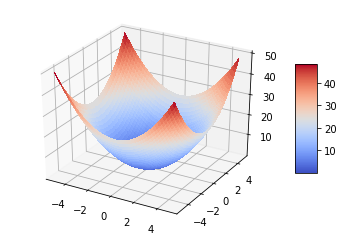

In [74]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


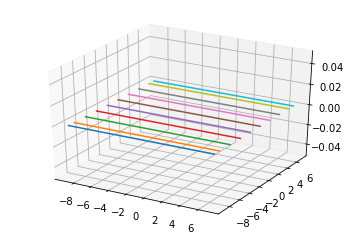

In [99]:
x = np.arange(-5,5,1)
y = np.arange(-5,5,1)
X,Y = np.meshgrid(x,y)
Z = (X**2 +Y**2)


dhdx,dhdy = np.gradient(Z)
plt.plot(dhdx,dhdy)
plt.show()

In [105]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(X, Y, Z, dhdx, dhdy,dhdx+dhdy, color='r',
          angles='xy', scale_units='xy')
#ax.contour(X, Y, Z)
plt.show()

AttributeError: Unknown property angles

## Identity function and Softmax function

### Softmax function
$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^n\exp(a_i)}$$

In [8]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #log func
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [9]:
def softmax_with_overflow(a):
    exp_a = np.exp(a) #log func
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [10]:
# To prevent from overflow problem, we need to make a caution
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #log func
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^n\exp(a_i)}\\
= \frac{C\exp(a_k)}{C\sum_{i=1}^n\exp(a_i)}\\
= \frac{\exp(a_k+logC)}{\sum_{i=1}^n\exp(a_i+logC)}\\
= \frac{\exp(a_k+C')}{\sum_{i=1}^n\exp(a_i+C')}
$$
normally, $C$ is selected for maximum number in the array.

## 2 Layer Neural Network

X is array of N by M.  

$$
X= (N,m)\\
W1=(m,n)\\
b1=(n,1)\\
a1 = X*W1 + b1\\
z1 = sigmoid(a1)\\
$$

In [11]:
import sys, os
sys.path.append(os.pardir)

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) #Input_size by hidden_size
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) #hidden_size by output_size
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    #x: input data, y = label
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)

    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accu = np.sum(y == t) / float(x.shape[0])
        return accu
    
    
    # x: input data, t: label
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(network.params['W1'].shape)
print(network.params['b1'].shape)
print(network.params['W2'].shape)
print(network.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [15]:
x = np.random.rand(100, 784)
y = network.predict(x)

In [16]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
print(x.shape)
grads = network.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(100, 784)
(784, 100)
(100,)
(100, 10)
(10,)


## Minibatch


In [ ]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from MNIST_data import mnist

(x_train, t_train), (x_test, t_test)= \
mnist.load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# Hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100 # Size of minibatch
learning_rate = 0.1

# one epoch
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # Gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # Update parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # Log 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc: ",str(train_acc),", test :",str(test_acc))

train acc:  0.102183333333 , test : 0.101
